# Calculation and Plot a Combined Lifetime Distribution for one Day

Last hack day -> hurry.

In [1]:
import os, sys, glob
import tobac

import xarray as xr
import numpy as np

import pylab as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cf

## Open Data

In [2]:
main_dir = '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/' 

flist = glob.glob(f'{main_dir}/r2b9_lite_1224?/precip_features_thresh*/daily_precip_features_thresh*_20200601.nc')

flist = sorted( flist )

In [3]:
flist

['/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh100/daily_precip_features_thresh100_20200601.nc',
 '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh200/daily_precip_features_thresh200_20200601.nc',
 '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh50/daily_precip_features_thresh50_20200601.nc',
 '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh500/daily_precip_features_thresh500_20200601.nc',
 '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224c/precip_features_thresh100/daily_precip_features_thresh100_20200601.nc',
 '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224c/precip_features_thresh200/daily_precip_features_thresh200_20200601.nc',
 '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224c/precip_features_thresh50

In [4]:
feat_dict = {}

for fname in flist:
    
    feat = xr.open_dataset( fname )

    
    feat_dict[fname] = feat.to_dataframe()
    

## Tracking

In [5]:
track_dict = {}

for bname in feat_dict.keys():
    
    feat = feat_dict[bname]

    dt = 15*60
    dxy = 5e3

    tr = tobac.linking_trackpy( feat, None, dt, dxy, d_max = 5*dxy, )

    track_dict[bname] = tr
    

Frame 95: 2855 trajectories present.


## Lifetime

In [32]:
lt_dict = {}

for bname in track_dict.keys():

    tr = track_dict[bname]
    bins = 15 * np.arange( 4*24 )
    h1, xe, xc = tobac.lifetime_histogram( tr, bin_edges=bins )

    lt_dict[bname] = h1

Text(0.35, 0.85, 'only one day 2020-06-01')

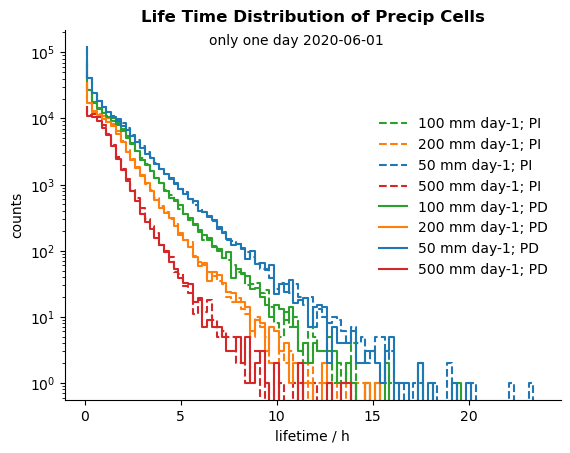

In [33]:
colors = ['C0','C2','C1','C3']
styles = ['-','--']
labs = ['PD', 'PI']


for n, fname in enumerate(track_dict.keys()):

    bname = os.path.basename( fname )
    
    
    thresh = str(bname).split('_')[3].replace('thresh','')

    if int(thresh) == 50:
        i = 0
    elif int(thresh) == 100:
        i = 1
    elif int(thresh) == 200:
        i = 2    
    elif int(thresh) == 500:
        i = 3

    if 'r2b9_lite_1224c' in fname:
        k = 0
    else:
        k = 1

    label = f'{thresh} mm day-1; {labs[k]}' 
        
    h1 = lt_dict[fname]
    plt.step(xc/60, h1, label = label, color = colors[i], linestyle = styles[k] )
    
plt.yscale('log')
plt.xlabel('lifetime / h')
plt.ylabel('counts')
plt.legend( bbox_to_anchor = (1.,0.8), frameon = False )
sns.despine()

plt.title('Life Time Distribution of Precip Cells', fontweight = 'bold')
plt.figtext(0.35,0.85, 'only one day 2020-06-01')

In [19]:
fname

'/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224c/precip_features_thresh500/daily_precip_features_thresh500_20200601.nc'